## NAME - AKASH SINGH

# Review Exercises in Linear Algebra-2

**Exercise 1:** Explore the concept of definiteness of an arbitrary symmetric square matrix in Numpy.

**ANSWER:** Any matrix A is known as positive definite if all of their eigen values are positive.


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

#lets create a arbritary symmetric matrix
A = np.array([[1,2,5],
              [2,12,6],
              [5,6,0]])

eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)



[-5.19676525  2.67839438 15.51837087]
[[ 0.57195922 -0.77648914 -0.26443764]
 [ 0.21012957  0.45031232 -0.86779282]
 [-0.79291123 -0.44077593 -0.42072362]]


**Exercise 2.1** For arbitrary matrix **W**, find the eigenvalues and eigenvectors in *Numpy* or *TensorFlow* or *PyTorch*. Check if the eigenvectors computed are the same as the ones estimated by hand? If they do not match, try normalizing the components of the eigenvectors estimated by hand with the respective magnitudes of the eigenvectors. Comment on the results.

Eigen vectors returned by numpy are the normalized eigen vectors(essentially they are unit vectors) by their respective L2 Norm 


In [110]:

W = np.array([[4,3],
              [5,2]])
lamda , V = np.linalg.eig(W)
print(lamda)
print(V)


[ 7. -1.]
[[ 0.70710678 -0.51449576]
 [ 0.70710678  0.85749293]]


**Exercise 2.2** Does a matrix which only results in a rotation of a vector have eigenvalues and eigenvectors?

**ANSWER:** Considering a 2x2 rotation matrix (Will result in only rotation after applying the transformation) , in general it is represented by
$$
A_{\theta} = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}
$$

Conceptually it can seen that since this matrix does the Linear transformation of rotation, therfore there is no vector $X$ and real scalar value $\lambda$ for $\lambda X$ to be remain in the same direction as X   
Another viewpoint is the property of Anti symmetric matrix, Since this matrix is an anti symmetric matrix for all $\theta$ , their eigen values will be purely imaginary.


In [ ]:

# Taking the particular example of 90 degree rotation

A = np.array([[0,-1],
              [1,0]]) 



  

**Exercise 2.3** Consider a symmetric matrix *W* i.e.,$W^T=W$. Is it’s inverse $W^{-1}$ symmetric? What will the eigen decomposition look like for this symmetric matrix?

In [66]:
size = 3  # Change this to the desired size of the matrix
upper_triangular = np.random.randint(1,10,(size, size))  # Upper triangular elements
W = upper_triangular + upper_triangular.T - np.diag(upper_triangular.diagonal())
print(f"symmetric matrix W :\n{W}")

W_inv = np.linalg.inv(W)
equal = np.allclose(W_inv,W_inv.T)
print(f"Inverse of a symmetric matrix W is :\n{W_inv}")

if equal:
    print("Inverse of a symmetric matrix is also a symmetric matrix")
else:
    print("----")    


symmetric matrix W :
[[ 5 10 13]
 [10  1 12]
 [13 12  5]]
Inverse of a symmetric matrix W is :
[[-0.07915718  0.06036446  0.06093394]
 [ 0.06036446 -0.08200456  0.03986333]
 [ 0.06093394  0.03986333 -0.05410023]]
Inverse of a symmetric matrix is also a symmetric matrix


**Exercise 2.4** For the eigen decomposition of matrix $W$, verify that $V$ is orthogonal.

In [67]:
size = 3  # Change this to the desired size of the matrix
upper_triangular = np.random.randint(1,10,(size, size))  # Upper triangular elements
W = upper_triangular + upper_triangular.T - np.diag(upper_triangular.diagonal())

lamda, V = np.linalg.eig(W)
print(f"The eigenvectors of matrix(symmetric) W is :\n{V}")

V_inv = np.linalg.inv(V)
print(f"the inverse of V is :\n {V_inv}")

print(f"Transpose of matrix V is: \n {V.T}")

equal = np.allclose(V_inv,V.T)
if equal:
    print("inverse of a matrix (V_inv) is equal to its transpose ,therefore its verified that eigenvectors of symmetric martices are orthogonal to each other")
else:
    print("-----")    




The eigenvectors of matrix(symmetric) W is :
[[-0.61463746 -0.66338947  0.42677302]
 [-0.5262936  -0.05812244 -0.84831411]
 [-0.58756774  0.74601354  0.3134134 ]]
the inverse of V is :
 [[-0.61463746 -0.5262936  -0.58756774]
 [-0.66338947 -0.05812244  0.74601354]
 [ 0.42677302 -0.84831411  0.3134134 ]]
Transpose of matrix V is: 
 [[-0.61463746 -0.5262936  -0.58756774]
 [-0.66338947 -0.05812244  0.74601354]
 [ 0.42677302 -0.84831411  0.3134134 ]]
inverse of a matrix (V_inv) is equal to its transpose ,therefore its verified that eigenvectors of symmetric martices are orthogonal to each other


**Exercise 2.5.1** Consider raising the matrix $W$ to power $p$ ($p>0$), i.e., $W^p$. If $p$ is large, can eigen-decomposition of matrix $W$ result in computational savings? If so, by how much?

In [68]:
import time
size = 3  # Change this to the desired size of the matrix
upper_triangular = np.random.randint(1,5,(size, size))  # Upper triangular elements
W = upper_triangular + upper_triangular.T - np.diag(upper_triangular.diagonal())

p = 200
start_time1 = time.time()

W_dir = np.linalg.matrix_power(W,p)
end_time1 = time.time()
elapsed_time1 = end_time1 - start_time1

print(W_dir)
print(f"time elapsed for direct multiplication : {elapsed_time1}")

start_time2 = time.time()
lamda,X = np.linalg.eig(W)

lamda = lamda**p
lamda = np.diag(lamda)
W_dec = X @ lamda @ (X.T)
end_time2 = time.time()

print(W_dec)
elapsed_time2 = end_time2 - start_time2
print(f"time elapsed for decomposition : {elapsed_time2}")


[[  909138086 -1936877864 -1532449021]
 [-1936877864 -1091738179  1774412295]
 [-1532449021  1774412295  -937154190]]
time elapsed for direct multiplication : 0.0
[[4.67942101e+231 5.94476346e+231 5.57502158e+231]
 [5.94476346e+231 7.55226180e+231 7.08253959e+231]
 [5.57502158e+231 7.08253959e+231 6.64203232e+231]]
time elapsed for decomposition : 0.0


**Exercise 2.5.2** If a negative power $p={-1}$ is considered, obtain an expression for $W^{-1}$. Under what conditions will this yield $W^{-1}$. 

**Exercise 2.5.3** Show that the det($W$) is the product of all the eigenvalues.

### Covariance Matrix and Eigen Decomposition

3.1 Consider generating random data points in the x-y plane with the mean at the origin and a standard deviation of 1.
$$ C = \begin{bmatrix}
\text{var}(x) & \text{cov}(x,y) \\
\text{cov}(x,y) & \text{var}(y)
\end{bmatrix} = \frac{1}{{N - 1}} \begin{bmatrix}
\sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i y_i \\
\sum_{i=1}^{n} x_i y_i & \sum_{i=1}^{n} y_i^2
\end{bmatrix} $$
What is the covariance matrix for uncorrelated data? 






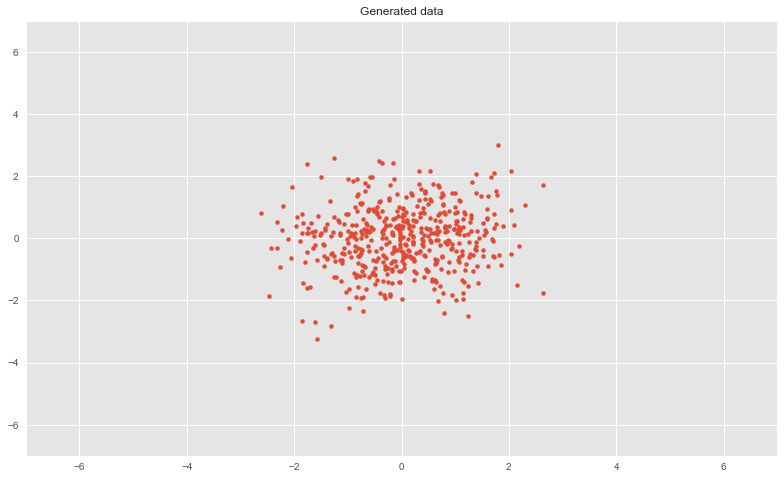

The covariance matrix for the randomly generated data is C: 
 [[1.00200401 0.10517871]
 [0.10517871 1.00200401]]


In [113]:


#Generating the data from normal distribution, A point is to note that x and y are generated separately and randomly ,so there will be very less corelation between them uncorrelated data)
np.random.seed(981)
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)

x = ((x-x.mean())/x.std())[:,None]
y = ((y-y.mean())/y.std())[:,None]

# Creaing a data matrix where vectors are arranged in Rows.[x,y]
orig_data = np.hstack((x,y))   

# Visualising the Generated data
plt.scatter(orig_data[:,0],orig_data[:,1],s=15)
plt.style.use('seaborn')
plt.title('Generated data')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.show()
C = np.cov(orig_data[:,0],orig_data[:,1])
print(f"The covariance matrix for the randomly generated data is C: \n {C}")


3.2 Explore the effects of applying a set of linear transformations such as scaling (stretching/compressing) the data along the x and y axes and a rotational transformation about the origin to skew the data as discussed in the lecture. 

$$
\begin{align*}
C_{scale} &= SC = \begin{bmatrix}
s_x & 0 \\
0 & s_y
\end{bmatrix}
\begin{bmatrix}
\frac{1}{{N - 1}}\sum\limits_i^n {x_i^2} & 0 \\
0 & \frac{1}{{N - 1}}\sum\limits_i^n {y_i^2}
\end{bmatrix} \\
C_{rotate} &= RC = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}
\begin{bmatrix}
\frac{1}{{N - 1}}\sum\limits_i^n {x_i^2} & 0 \\
0 & \frac{1}{{N - 1}}\sum\limits_i^n {y_i^2}
\end{bmatrix}
\end{align*}
$$

The rotation angle $\theta$ in radians is positive counterclockwise from y=0. Assess the effect of these transformations on the original data set and verify the covariance matrices for each. Explore the impact of the order of applying the rotation and  stretching to the original data -stretching followed by rotation and rotation followed by stretching. Record your observations.




the covariance matrix of first scaled data is : 
 [[1.00200401 0.21035742]
 [0.21035742 4.00801603]]
the covariance matrix of second rotated data is : 
 [[ 2.2946526  -1.50300601]
 [-1.50300601  2.71536744]]
the covariance matrix of first Rotated data is : 
 [[8.96825296e-01 1.19254417e-16]
 [1.19254417e-16 1.10718272e+00]]
the covariance matrix of seconf scaled data is : 
 [[8.96825296e-01 1.19254417e-16]
 [1.19254417e-16 1.10718272e+00]]


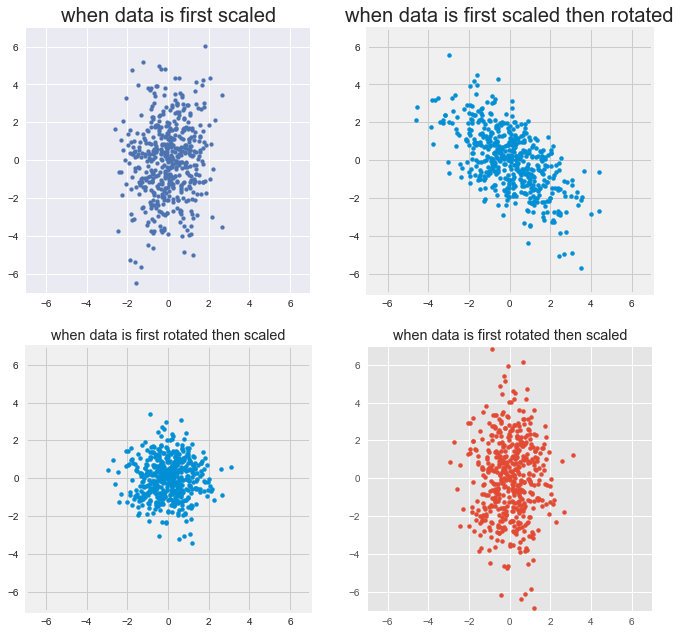

In [84]:
#Enter your work here
def scaling(data,diagonal):
    scaling_matrix = np.diag(diagonal)
    data_scale = scaling_matrix @ data.T
    data_scale = data_scale.T
    return data_scale

def rotation(data,theta):
    rad = (theta/180)*math.pi
    Rot_matrix = np.array([[math.cos(rad),-1*(math.sin(rad))],
                       [math.sin(rad),math.cos(rad)]])

    data_rot = Rot_matrix @ data.T
    data_rot = data_rot.T
    return data_rot

def plot(data):
    plt.scatter(data[:,0],data[:,1],s = 15)
    plt.style.use('fivethirtyeight')
    plt.xlim(-7,7)
    plt.ylim(-7,7)
    

first_scaling = scaling(orig_data,np.array([1,2]))
C_first_scaling = np.cov(first_scaling[:,0],first_scaling[:,1])
print(f"the covariance matrix of first scaled data is : \n {C_first_scaling}")
second_rotation = rotation(first_scaling,45)
C_second_rotation = np.cov(second_rotation[:,0],second_rotation[:,1])
print(f"the covariance matrix of second rotated data is : \n {C_second_rotation}")

first_rotation = rotation(orig_data,45)
C_first_rotation = np.cov(first_rotation[:,0],first_rotation[:,1])
print(f"the covariance matrix of first Rotated data is : \n {C_first_rotation}")

second_scaling = scaling(first_rotation,np.array([1,2]))
c_second_scaling =  np.cov(second_scaling[:,0],second_scaling[:,1])
print(f"the covariance matrix of seconf scaled data is : \n {C_first_rotation}")


plt.figure(figsize= (10,10))
plt.subplot(221)
plot(first_scaling)
plt.style.use('fivethirtyeight')
plt.title('when data is first scaled')

plt.subplot(222)
plot(second_rotation)
plt.style.use('fivethirtyeight')
plt.title('when data is first scaled then rotated')

plt.subplot(223)
plot(first_rotation)
plt.style.use('ggplot')
plt.title('when data is first rotated then scaled')

plt.subplot(224)
plot(second_scaling)
plt.style.use('ggplot')
plt.title('when data is first rotated then scaled')

plt.show()



3.3 Explore the connection between the linear transformations and the covariance matrix using the eigen decomposition method.

3.3.1 Find the eigenvalues and the eigenvectors of the covariant matrix C and set up the components of the eigen decomposition method i.e., $C = V\Lambda {V^{ - 1}}$. Verify that the eigenvectors are unit vectors representing the direction of the largest variance of the data, while the eigenvalues represent the magnitude of this variance in the corresponding directions. Hence V represents the rotation matrix R while  $\sqrt \Lambda  $ represents the scaling matrix S.

[[1.10718272 0.        ]
 [0.         0.8968253 ]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


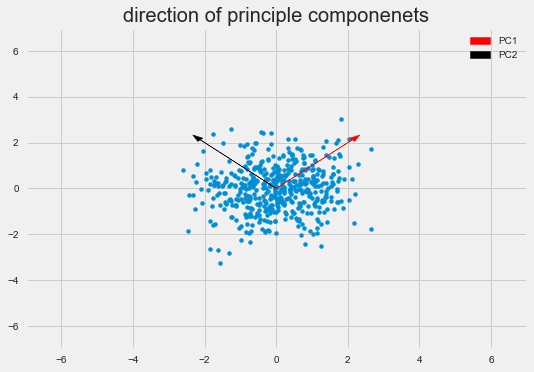

In [133]:
#Enter your work here
lamda,V = np.linalg.eig(C)
lamda = np.diag(lamda)
V_inv = np.linalg.inv(V)
print(lamda)
print(V)
print(V_inv)

plot(orig_data)
plt.arrow(0, 0,3*V[0,0],3*V[1,0] , head_width=0.2, head_length=0.3, fc='red', ec='red', label='PC1')
plt.arrow(0, 0,3*V[0,1],3*V[1,1] , head_width=0.2, head_length=0.3, fc='black', ec='black', label='PC2')
plt.title('direction of principle componenets')
plt.legend()
plt.show()


transformation_matrix = V@(lamda**0.5) 





3.3.2 Based on the premise of 3.3.1 work out the following interpretation and demonstrate with arbitrary matrices of your choice:


$C = V\Lambda {V^{ - 1}} = V\sqrt \Lambda  \sqrt \Lambda  {V^{ - 1}} = RSS{R^{ - 1}}\\
{\rm{If\text{ } }}T = RS{\rm{ \text{ } then\text{ } }}C = RSS{R^{ - 1}} = T{T^T}\\
{T^T} = {\left( {RS} \right)^T} = {S^T}{R^T} = S{R^{ - 1}}\\
{\rm{ }}S = {S^T}{\rm{ since\text{ } }}S{\rm{ \text{ } is \text{ }diagonal}}\\
{R^T} = {R^{ - 1}}{\rm{ since \text{ }}}R{\rm{\text{ } is \text{ }orthogonal}}\\
T = RS = V\sqrt \Lambda $ 



4.1 For arbitrary matrices $A$ of your choice (square, short and fat and tall and skinny ) estimate the full SVD, economy SVD and the truncated SVD of $A$. Verify that the singular values are the square roots of the eigenvalues of  $A^TA$ or $AA^T$.

In [15]:

#1--> Tall Matrix

np.random.seed(111)
u=np.random.randn(100)
v=np.random.randn(100)
w=np.random.randn(100)
p=np.random.randn(100)

stacked_array = np.vstack((u,v,w,p))
data = stacked_array.T


U,S,VT = np.linalg.svd(data)

print(U.shape)
print(S.shape)

print(VT.shape)


U_eco, S_eco, VT_eco = np.linalg.svd(data, full_matrices=False)

print(U_eco.shape)
print(S_eco.shape)
print(S_eco)
print(VT_eco.shape)


(100, 100)
(4,)
(4, 4)
(100, 4)
(4,)
[11.73268287 10.11014024  9.7801845   8.66700117]
(4, 4)


4.2 For the same arbitrary matrices $A$ (square, short and fat and tall and skinny) considered in 4.1, estimate the truncated SVD of $A$ (b) Determine the pseudo-inverse of these matrices for the system $Ax=b$ and assess $AA^{\dagger}$.

4.3 Digest and elucidate the relationship between SVD and Eigen Decomposition method and explore the differences if (a) $X$ is symmetric and all the eigenvalues are non-negative (b)$X$ is symmetric but some eigenvalues are negative (c)$X$ is not symmetric but diagonalizable.

4.4 In Section 4 on Principal Component Analysis (PCA) the principal components of a centered data set $B$ is constructed from eigen decomposition as  $T=BV$. Make the connection of PCA with SVD by considering the SVD of $B$.

###  PCA for  Dimensional Reduction 

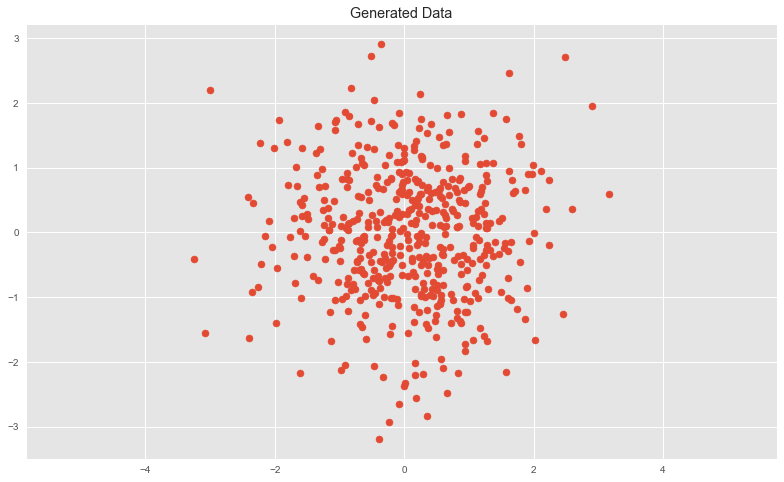

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

In [92]:
#Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 1.0198519 , -0.00294489],
       [-0.00294489,  1.00897508]])

array([[ 4.99727431e-01, -7.00883977e-03],
       [-7.00883977e-03,  1.16637519e+01]])

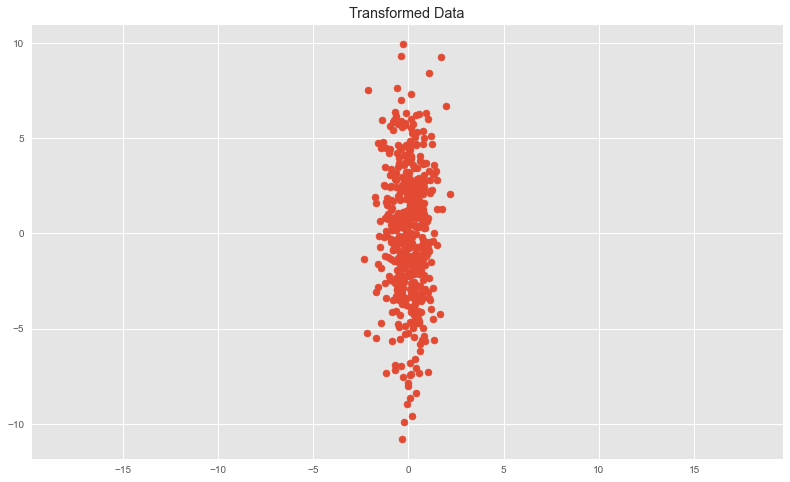

In [93]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

array([[5.37517447, 5.53711798],
       [5.53711798, 6.78830491]])

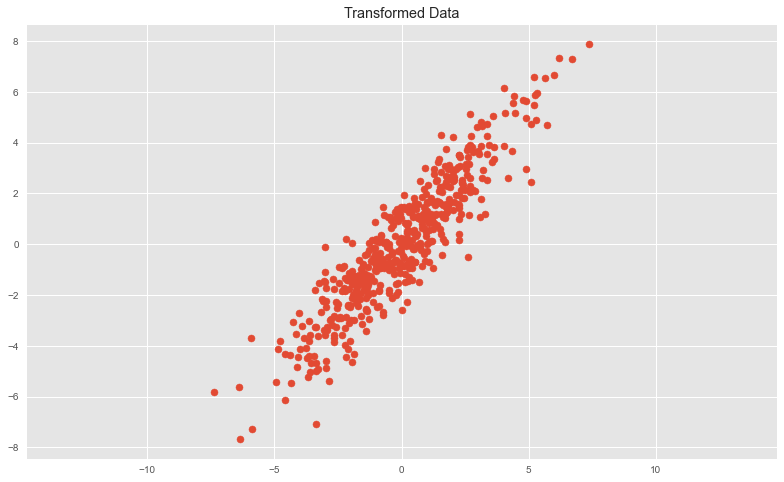

In [94]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = -0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

# Calculate covariance matrix
cov_mat(Y.T)

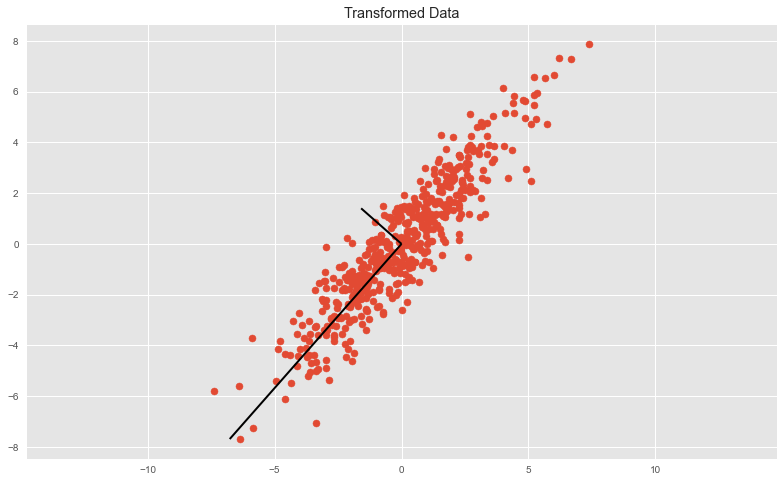

In [95]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])
for e, v in zip(eVe, eVa.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-', lw=2)
plt.title('Transformed Data')
plt.axis('equal');

array([[1.00000000e+00, 4.27180001e-16],
       [4.27180001e-16, 1.00000000e+00]])

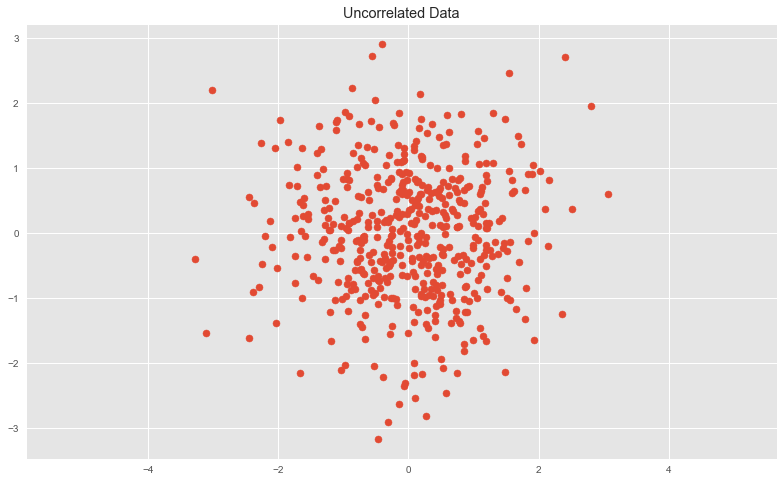

In [96]:
C = cov_mat(Y.T)

# Calculate eigenvalues
eVa, eVe = np.linalg.eig(C)

# Calculate transformation matrix from eigen decomposition
R, S = eVe, np.diag(np.sqrt(eVa))
T = R.dot(S).T

# Transform data with inverse transformation matrix T^-1
Z = Y.dot(np.linalg.inv(T))

plt.scatter(Z[:, 0], Z[:, 1])
plt.title('Uncorrelated Data')
plt.axis('equal');

# Covariance matrix of the uncorrelated data
cov_mat(Z.T)

###  SVD  Code for  Dimensional Reduction 

U=
 [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0. -1.  0.]]
sigma=
 [3.         2.23606798 2.         0.        ]
Sigma=
 [[3.         0.         0.         0.         0.        ]
 [0.         2.23606798 0.         0.         0.        ]
 [0.         0.         2.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Vt=
 [[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [ 0.         -1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


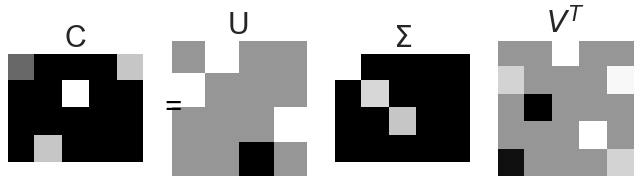

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Input the matrix and compute its singular value decomposition
C=np.array([[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,2,0,0,0]])
U,sigma,Vt=np.linalg.svd(C)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as C
Sigma=np.zeros(C.shape) # Sigma has the same shape as C
m=np.amin(C.shape) # pick the smaller number between the number of rows and columns 
Sigma[0:m,0:m]=np.diag(sigma) # place the singular values on the diagnal of Sigma
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Let's visualize the above product
# split the figure into 4 subplots
fig,subs=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
# remove the x and y ticks and labels from all the subplots
plt.setp(subs, xticks=[], xticklabels=[],yticks=[],yticklabels=[])
# plot the matrices
subs[0].imshow(C,cmap=cm.Greys_r)
subs[0].set_title('C',fontsize=30)
subs[1].imshow(U,cmap=cm.Greys_r)
subs[1].set_title('U',fontsize=30)
subs[2].imshow(Sigma,cmap=cm.Greys_r)
subs[2].set_title('$\Sigma$',fontsize=30)
subs[3].imshow(Vt,cmap=cm.Greys_r)
subs[3].set_title('$V^T$',fontsize=30)

fig.text(0.31,0.5,'=',horizontalalignment='center',
     verticalalignment='center', fontsize=30, color='k')

plt.savefig('Fig_visualize_svd.png')